In [7]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()
sns.set_style("whitegrid")


from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()

# change for depths 
# PMT depths -  0.8 mm diameter , 2 mm length
# spencer depth 1.12 mm diameter, 2.41 mm length

r = 0.15/2
area = np.pi*(r**2)

depth_r = 0.08/2
depth_h = 0.2
depth_area = 2*np.pi*depth_r*depth_h
depth_area = area


current = np.array([1000])
pulse_width = np.array([1e-4, 1e-3,1.2e-3])

meshed_grid_x, meshed_grid_y = np.meshgrid(pulse_width,current)

charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/area

log_charge_density = np.log10(charge_density)

# shannon 
k = 1.85
q = np.arange(-1, 1.51,0.1)
d = (1.85-(q))

charge_density
#depth_area

Loading BokehJS ...

array([[  5.65884242,  56.58842421,  67.90610905]])

In [3]:
currentB = np.array([1000])
pulse_widthB = np.array([1e-4, 1e-3,1.2e-3])
depth_r_b = 0.112/2
depth_h_b = 0.241
area_b = 2*np.pi*depth_r_b*depth_h_b

meshed_grid_xB, meshed_grid_yB = np.meshgrid(pulse_widthB,currentB)

charge_per_phaseB = meshed_grid_xB*meshed_grid_yB

log_charge_per_phaseB = np.log10(charge_per_phaseB)

# look at charge/cm^2

# charge density

charge_densityB = charge_per_phaseB/area_b

log_charge_densityB = np.log10(charge_densityB)

charge_per_phaseB
#charge_per_phase
charge_densityB
area_b

0.08479786890569568

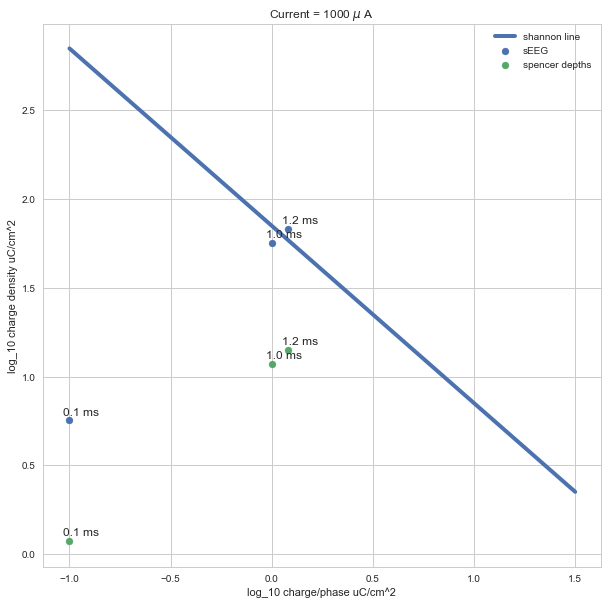

In [8]:
flat_log_d = np.ndarray.flatten(log_charge_density)
flat_log_c = np.ndarray.flatten(log_charge_per_phase)
flat_log_dB = np.ndarray.flatten(log_charge_densityB)
flat_log_cB = np.ndarray.flatten(log_charge_per_phaseB)



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(flat_log_c,flat_log_d,label='sEEG')
for i, txt in enumerate(pulse_width):
   ax.annotate(str(1e3*txt ) + ' ms', (flat_log_c[i]-.03,flat_log_d[i]+.03))
    
ax.scatter(flat_log_cB,flat_log_dB,label = 'spencer depths')
for i, txt in enumerate(pulse_width):
    ax.annotate(str(1e3*txt ) + ' ms', (flat_log_cB[i]-.03,flat_log_dB[i]+.03))
    

plt.plot(q,d,linewidth=4,label='shannon line')
plt.ylabel('log_10 charge density uC/cm^2')
plt.xlabel('log_10 charge/phase uC/cm^2')
plt.title(r'Current = {} $\mu$ A'.format(current[0]))
plt.legend()
plt.show()


In [9]:

charge_per_phase= pulse_widthB*current
print('the charge per phase is {} uC'.format(charge_per_phase))

# look at log10 like 2016 paper 
print('the charge per phase is {} log10 uC'.format(np.log10(charge_per_phase)))

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/area

print('the charge density is {} uC/cm^2'.format(charge_density))

# look at log10 

print ('the charge per phase is {} log10 uC/cm^2'.format(np.log10(charge_density)))

the charge per phase is [ 0.1  1.   1.2] uC
the charge per phase is [-1.          0.          0.07918125] log10 uC
the charge density is [  5.65884242  56.58842421  67.90610905] uC/cm^2
the charge per phase is [ 0.7527276   1.7527276   1.83190885] log10 uC/cm^2


In [11]:
charge_per_phase

array([ 0.1,  1. ,  1.2])